# Generate Atmospheric transparency grids

In [1]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
import pandas as pd
from itertools import cycle, islice
import seaborn as sns

In [45]:
import copy
import pickle

In [3]:
# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


In [4]:
from scipy import interpolate

In [5]:
from libradtranpy import  libsimulateVisible

libradtranpath= /Users/dagoret/MacOSX/External/libRadtran2/


In [6]:
import warnings
warnings.filterwarnings('ignore')

# Configuration

In [7]:
file01_out = f"atmospherictransparencygrid_params_training.pickle"
file02_out = f"atmospherictransparencygrid_params_test.pickle"

In [8]:
file1_out = f"atmospherictransparencygrid_rayleigh_training.npy"
file2_out = f"atmospherictransparencygrid_rayleigh_test.npy"

In [9]:
file3_out = f"atmospherictransparencygrid_O2abs_training.npy"
file4_out = f"atmospherictransparencygrid_O2abs_test.npy"

In [10]:
file5_out = f"atmospherictransparencygrid_PWVabs_training.npy"
file6_out = f"atmospherictransparencygrid_PWVabs_test.npy"

In [11]:
file7_out = f"atmospherictransparencygrid_OZabs_training.npy"
file8_out = f"atmospherictransparencygrid_OZabs_test.npy"

In [12]:
info_params = {}

### wavelength

In [13]:
WLMIN=300.
WLMAX=1100.
WLBIN=1.
NWLBIN=int((WLMAX-WLMIN)/WLBIN)
WL=np.linspace(WLMIN,WLMAX,NWLBIN)

In [14]:
info_params["WLMIN"] = WLMIN
info_params["WLMAX"] = WLMAX
info_params["WLBIN"] = WLBIN
info_params["NWLBIN"] = NWLBIN
info_params["WL"] = WL

In [15]:
info_params_training = copy.deepcopy(info_params)
info_params_test = copy.deepcopy(info_params)

### airmass

In [16]:
AIRMASSMIN=1.0
AIRMASSMAX=2.6
#AIRMASSMAX=1.1
DAM = 0.1

In [17]:
airmasses = np.arange(AIRMASSMIN,AIRMASSMAX,DAM)

In [18]:
airmasses

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5])

In [19]:
NAM=len(airmasses)

In [20]:
sequential_colors = sns.color_palette("hls", NAM)

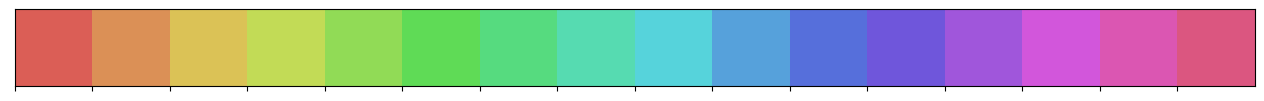

In [21]:
sns.palplot(sequential_colors)

In [22]:
airmass_training = airmasses
airmass_test = airmasses + DAM/2.

In [23]:
NX=len(airmasses)
NY=NWLBIN

In [24]:
info_params_training["AIRMASSMIN"] = airmass_training.min()
info_params_training["AIRMASSMAX"] = airmass_training.max()
info_params_training["NAIRMASS"] = len(airmass_training)
info_params_training["DAIRMASS"] = np.median(np.diff(airmass_training))
info_params_training["AIRMASS"]  = airmass_training

In [25]:
info_params_test["AIRMASSMIN"] = airmass_test.min()
info_params_test["AIRMASSMAX"] = airmass_test.max()
info_params_test["NAIRMASS"] = len(airmass_test)
info_params_test["DAIRMASS"] = np.median(np.diff(airmass_test))
info_params_test["AIRMASS"]  = airmass_test

In [29]:
#info_params_training

In [30]:
#info_params_test

### PWV

In [31]:
PWVMIN = 0
PWVMAX = 11
DPWV = 0.5

In [32]:
pwv_training = np.arange(PWVMIN,PWVMAX,DPWV)
pwv_test = pwv_training + DPWV/2.

In [33]:
NPWV = len(pwv_training)

In [34]:
info_params_training["PWVMIN"] = pwv_training.min()
info_params_training["PWVMAX"] = pwv_training.max()
info_params_training["NPWV"] = len(pwv_training)
info_params_training["DPWV"] = np.median(np.diff(pwv_training))
info_params_training["PWV"]  = pwv_training

In [35]:
info_params_test["PWVMIN"] = pwv_test.min()
info_params_test["PWVMAX"] = pwv_test.max()
info_params_test["NPWV"] = len(pwv_test)
info_params_test["DPWV"] = np.median(np.diff(pwv_test))
info_params_test["PWV"]  = pwv_test

### OZONE

In [36]:
OZMIN = 0
OZMAX = 600
DOZ   = 100

In [37]:
oz_training = np.arange(OZMIN,OZMAX,DOZ)
oz_test = oz_training  + DOZ/2.

In [38]:
NOZ = len(oz_training)

In [39]:
info_params_training["OZMIN"] = oz_training.min()
info_params_training["OZMAX"] = oz_training.max()
info_params_training["NOZ"] = len(oz_training)
info_params_training["DOZ"] = np.median(np.diff(oz_training))
info_params_training["OZ"]  = oz_training

In [44]:
#info_params_training

In [40]:
info_params_test["OZMIN"] = oz_test.min()
info_params_test["OZMAX"] = oz_test.max()
info_params_test["NOZ"] = len(oz_test)
info_params_test["DOZ"] = np.median(np.diff(oz_test))
info_params_test["OZ"]  = oz_test

In [43]:
#info_params_test

In [ ]:
#file01_out = f"atmospherictransparencygrid_params_training.pickle"
#file02_out = f"atmospherictransparencygrid_params_test.pickle"

In [46]:
with open(file01_out, 'wb') as handle:
    pickle.dump(info_params_training, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [47]:
with open(file02_out, 'wb') as handle:
    pickle.dump(info_params_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [48]:
with open(file01_out, 'rb') as handle:
    info_train = pickle.load(handle)
with open(file02_out, 'rb') as handle:
    info_test = pickle.load(handle)

In [ ]:
assert False

### Data

In [ ]:
data_O2abs_training=np.zeros((NWLBIN,NAM))
data_O2abs_test=np.zeros((NWLBIN,NAM))

data_rayleigh_training=np.zeros((NWLBIN,NAM))
data_rayleigh_test=np.zeros((NWLBIN,NAM))

In [ ]:
data_H2Oabs_training=np.zeros((NWLBIN,NAM,NPWV))
data_H2Oabs_test=np.zeros((NWLBIN,NAM,NPWV))

In [ ]:
data_OZabs_training=np.zeros((NWLBIN,NAM,NOZ))
data_OZabs_test=np.zeros((NWLBIN,NAM,NOZ))

In [ ]:
pwv= 0
pwv= 0
oz = 0

In [ ]:
for idx,am in enumerate(airmass_training):
    path,thefile = libsimulateVisible.ProcessSimulation(am,pwv,oz,0,prof_str='us',proc_str='sc',cloudext=0.0, FLAG_VERBOSE=False)
    data = np.loadtxt(os.path.join(path,thefile))
    f = interpolate.interp1d(x=data[:,0], y=data[:,1],fill_value="extrapolate")
    atm=f(WL)
    data_rayleigh_training[:,idx]=atm
    

In [ ]:
np.save(file1_out,data_rayleigh_training, allow_pickle=False)

In [ ]:
plt.plot(WL,data_rayleigh_training[:,:])

In [ ]:
for idx,am in enumerate(airmass_test):
    path,thefile = libsimulateVisible.ProcessSimulation(am,pwv,oz,0,prof_str='us',proc_str='sc',cloudext=0.0, FLAG_VERBOSE=False)
    data = np.loadtxt(os.path.join(path,thefile))
    f = interpolate.interp1d(x=data[:,0], y=data[:,1],fill_value="extrapolate")
    atm=f(WL)
    data_rayleigh_test[:,idx]=atm

In [ ]:
np.save(file2_out,data_rayleigh_test, allow_pickle=False)

In [ ]:
plt.plot(WL,data_rayleigh_test[:,:])

In [ ]:
for idx,am in enumerate(airmass_training):
    path,thefile = libsimulateVisible.ProcessSimulation(am,pwv,oz,0,prof_str='us',proc_str='ab',cloudext=0.0, FLAG_VERBOSE=False)
    data = np.loadtxt(os.path.join(path,thefile))
    f = interpolate.interp1d(x=data[:,0], y=data[:,1],fill_value="extrapolate")
    atm=f(WL)
    data_O2abs_training[:,idx]=atm

In [ ]:
np.save(file3_out,data_O2abs_training, allow_pickle=False)

In [ ]:
plt.plot(WL,data_O2abs_training[:,:])

In [ ]:
for idx,am in enumerate(airmass_test):
    path,thefile = libsimulateVisible.ProcessSimulation(am,pwv,oz,0,prof_str='us',proc_str='ab',cloudext=0.0, FLAG_VERBOSE=False)
    data = np.loadtxt(os.path.join(path,thefile))
    f = interpolate.interp1d(x=data[:,0], y=data[:,1],fill_value="extrapolate")
    atm=f(WL)
    data_O2abs_test[:,idx]=atm

In [ ]:
np.save(file4_out,data_O2abs_test, allow_pickle=False)

In [ ]:
plt.plot(WL,data_O2abs_test[:,:])

## Precipitable water vapor

In [ ]:
#data_H2Oabs_training=np.zeros((NY,NX,NPWV))
#data_H2Oabs_test=np.zeros((NY,NX,NPWV))
#data_H2Oabs_training=np.zeros((NWLBIN,NAM,NPWV))
#data_H2Oabs_test=np.zeros((NWLBIN,NAM,NPWV))

In [ ]:
oz=0
for idx_pwv,pwv in enumerate(pwv_training):
    data_slice_training=np.zeros((NWLBIN,NAM))
    for idx_am,am in enumerate(airmass_training):     
        path,thefile = libsimulateVisible.ProcessSimulation(am,pwv,oz,0,prof_str='us',proc_str='ab',cloudext=0.0, FLAG_VERBOSE=False)
        data = np.loadtxt(os.path.join(path,thefile))
        f = interpolate.interp1d(x=data[:,0], y=data[:,1],fill_value="extrapolate")
        atm=f(WL)
        data_slice_training[:,idx_am]=atm
        
    data_slice_training/=data_O2abs_training
    data_H2Oabs_training[:,:,idx_pwv] = data_slice_training
       

In [ ]:
np.save(file5_out,data_H2Oabs_training, allow_pickle=False)

In [ ]:
oz=0
for idx_pwv,pwv in enumerate(pwv_test):
    data_slice_test=np.zeros((NWLBIN,NAM))
    for idx_am,am in enumerate(airmass_test):     
        path,thefile = libsimulateVisible.ProcessSimulation(am,pwv,oz,0,prof_str='us',proc_str='ab',cloudext=0.0, FLAG_VERBOSE=False)
        data = np.loadtxt(os.path.join(path,thefile))
        f = interpolate.interp1d(x=data[:,0], y=data[:,1],fill_value="extrapolate")
        atm=f(WL)
        data_slice_test[:,idx_am]=atm
        
    data_slice_test/=data_O2abs_test
    data_H2Oabs_test[:,:,idx_pwv] = data_slice_test

In [ ]:
np.save(file6_out,data_H2Oabs_test,allow_pickle=False)

## Ozone

In [ ]:
pwv=0
for idx_oz,oz in enumerate(oz_training):
    data_slice_training=np.zeros((NWLBIN,NAM))
    for idx_am,am in enumerate(airmass_training):     
        path,thefile = libsimulateVisible.ProcessSimulation(am,pwv,oz,0,prof_str='us',proc_str='ab',cloudext=0.0, FLAG_VERBOSE=False)
        data = np.loadtxt(os.path.join(path,thefile))
        f = interpolate.interp1d(x=data[:,0], y=data[:,1],fill_value="extrapolate")
        atm=f(WL)
        data_slice_training[:,idx_am]=atm
        
    data_slice_training/=data_O2abs_training
    data_OZabs_training[:,:,idx_oz] = data_slice_training

In [ ]:
np.save(file7_out,data_OZabs_training, allow_pickle=False)

In [ ]:
pwv=0
for idx_oz,oz in enumerate(oz_test):
    data_slice_test=np.zeros((NWLBIN,NAM))
    for idx_am,am in enumerate(airmass_test):     
        path,thefile = libsimulateVisible.ProcessSimulation(am,pwv,oz,0,prof_str='us',proc_str='ab',cloudext=0.0, FLAG_VERBOSE=False)
        data = np.loadtxt(os.path.join(path,thefile))
        f = interpolate.interp1d(x=data[:,0], y=data[:,1],fill_value="extrapolate")
        atm=f(WL)
        data_slice_test[:,idx_am]=atm
        
    data_slice_test/=data_O2abs_test
    data_OZabs_test[:,:,idx_oz] = data_slice_test

In [ ]:
np.save(file8_out,data_OZabs_test, allow_pickle=False)